In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]


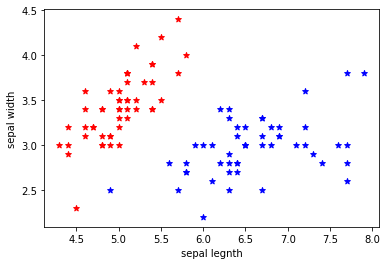

In [23]:
plt.xlabel('sepal legnth')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')


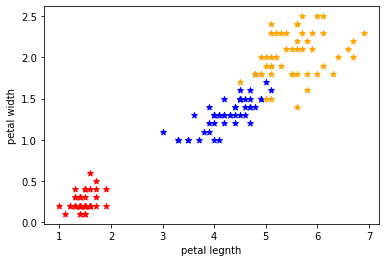

In [27]:
plt.xlabel('petal legnth')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='*')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='orange',marker='*')


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(['target','flower_name'],axis='columns')

In [30]:
y = df.target

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [34]:
from sklearn.svm import SVC
model = SVC()

In [35]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
model.score(X_test,y_test)

0.9666666666666667

In [37]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_predicted,y_test)

In [39]:
cm

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 10]], dtype=int64)

Text(33.0, 0.5, 'Truth')

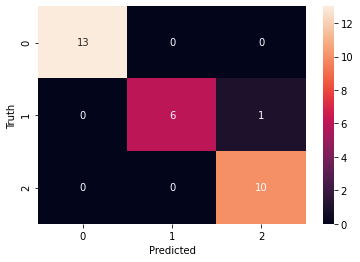

In [40]:
import matplotlib.pyplot as plt
import seaborn as sn 
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')